## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **나.  학습데이터 불러오기**

In [2]:
path = '데이터/train.csv'
data = pd.read_csv(path)

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

In [6]:
data.tail()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,4.135356,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,malicious
3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,4.362331,0.0,0.0,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,benign
3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,4.693343,0.0,0.0,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,malicious
3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,4.604166,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,benign
3663,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,3.619471,0.0,0.0,0.0,3.0,0.0,0.0,282.0,1.0,1.0,2.0,46.0,0.0,benign


In [5]:
pd.set_option('display.max_columns', 500)

In [7]:
# 데이터 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [8]:
# 결측치 존재 확인
data.isna().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label                      0
dtype: int64

In [9]:
# 기초통계량
data.describe()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
count,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0
mean,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,0.060862,4.228568,0.0,0.002183,0.220797,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0
std,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,0.239110,0.393055,0.0,0.046682,0.898383,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.737839,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.983196,0.0,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0
50%,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,4.189561,0.0,0.000000,0.000000,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0
75%,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,4.458940,0.0,0.000000,0.000000,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0
max,1837.000000,14.000000,1816.000000,109.000000,109.000000,32.000000,18.000000,429.000000,9.000000,1.000000,5.821782,0.0,1.000000,26.000000,267.000000,3.000000,8.000000,19941.000000,3.000000,3.000000,57.000000,13451.000000,0.0


In [10]:
# 상관계수
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_18152\195153614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
url_len,1.000000,-0.022953,0.943058,0.003787,0.004117,0.265846,0.313610,0.325916,0.275240,-0.064589,0.271695,NaN,0.045975,0.019931,-0.031145,-0.010579,-0.021014,-0.015684,0.070786,0.045527,-0.036414,-0.022283,NaN
url_num_hyphens_dom,-0.022953,1.000000,-0.097901,0.594874,0.596240,-0.086996,-0.060620,0.002167,-0.002100,-0.124119,0.074786,NaN,-0.022807,0.006434,-0.100745,-0.051755,-0.048505,-0.010727,0.050888,-0.037459,0.047858,-0.037136,NaN
url_path_len,0.943058,-0.097901,1.000000,-0.124312,-0.124199,0.200483,0.263025,0.015388,0.014283,-0.033650,0.148673,NaN,0.051577,0.031427,0.002900,-0.002139,-0.014861,-0.010336,0.072812,-0.004275,-0.041040,-0.010525,NaN
url_domain_len,0.003787,0.594874,-0.124312,1.000000,0.998949,0.073088,-0.089833,0.016346,0.016525,-0.150334,0.161295,NaN,-0.003697,-0.007128,-0.104146,-0.011061,-0.028923,-0.002282,0.011320,0.030886,0.029068,-0.037149,NaN
url_hostname_len,0.004117,0.596240,-0.124199,0.998949,1.000000,0.069218,-0.091201,0.017311,0.017465,-0.168709,0.164477,NaN,-0.027117,-0.006514,-0.101376,-0.010341,-0.030305,-0.001095,0.011210,0.031187,0.032199,-0.035864,NaN
url_num_dots,0.265846,-0.086996,0.200483,0.073088,0.069218,1.000000,0.252325,0.213499,0.182670,0.186597,0.186755,NaN,0.033792,-0.001028,-0.084727,-0.030866,-0.017066,-0.031888,-0.026245,-0.000420,-0.070070,-0.030922,NaN
url_num_underscores,0.313610,-0.060620,0.263025,-0.089833,-0.091201,0.252325,1.000000,0.238275,0.237910,-0.048530,0.249614,NaN,0.082260,-0.023664,-0.058133,-0.028490,-0.021347,-0.018447,0.060128,0.029485,-0.074647,-0.004400,NaN
url_query_len,0.325916,0.002167,0.015388,0.016346,0.017311,0.213499,0.238275,1.000000,0.838152,-0.047342,0.356455,NaN,-0.008699,-0.029652,-0.069966,-0.023136,-0.010979,-0.017879,0.000145,0.149054,-0.002468,-0.025314,NaN
url_num_query_para,0.275240,-0.002100,0.014283,0.016525,0.017465,0.182670,0.237910,0.838152,1.000000,-0.046220,0.326074,NaN,-0.008493,-0.032459,-0.068069,-0.022588,-0.016102,-0.016305,-0.017280,0.108940,-0.007007,-0.025140,NaN
url_ip_present,-0.064589,-0.124119,-0.033650,-0.150334,-0.168709,0.186597,-0.048530,-0.047342,-0.046220,1.000000,-0.159034,NaN,0.110379,-0.025720,-0.083789,-0.031671,0.050671,-0.033419,0.011231,-0.018812,-0.082826,-0.038185,NaN


In [ ]:
# 데이터 분포 확인

#### 범주형 확인
- url_ip_present : URL 내 IP 표시 여부 >> 범주
- url_entropy : URL 복잡도 >> 수치
- url_chinese_present: URL 내 중국어 표기 여부
- url_port : URL 내 포트 표기 여부
- label 악성여부

In [11]:
np.unique(data['url_ip_present']) # 범주형

array([0., 1.])

In [12]:
np.unique(data['url_entropy']) # 수치형


array([2.73783942, 2.81980834, 2.97186087, ..., 5.6764101 , 5.81552159,
       5.82178206])

In [13]:
np.unique(data['url_chinese_present']) # 0 만 존재


array([0.])

In [14]:
np.unique(data['url_port']) # 범주형


array([0., 1.])

In [15]:
np.unique(data['label']) # 범주형


array(['benign', 'malicious'], dtype=object)

## <b>Q2. 데이터 이변량 분석하기

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 적절한 유의수준
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

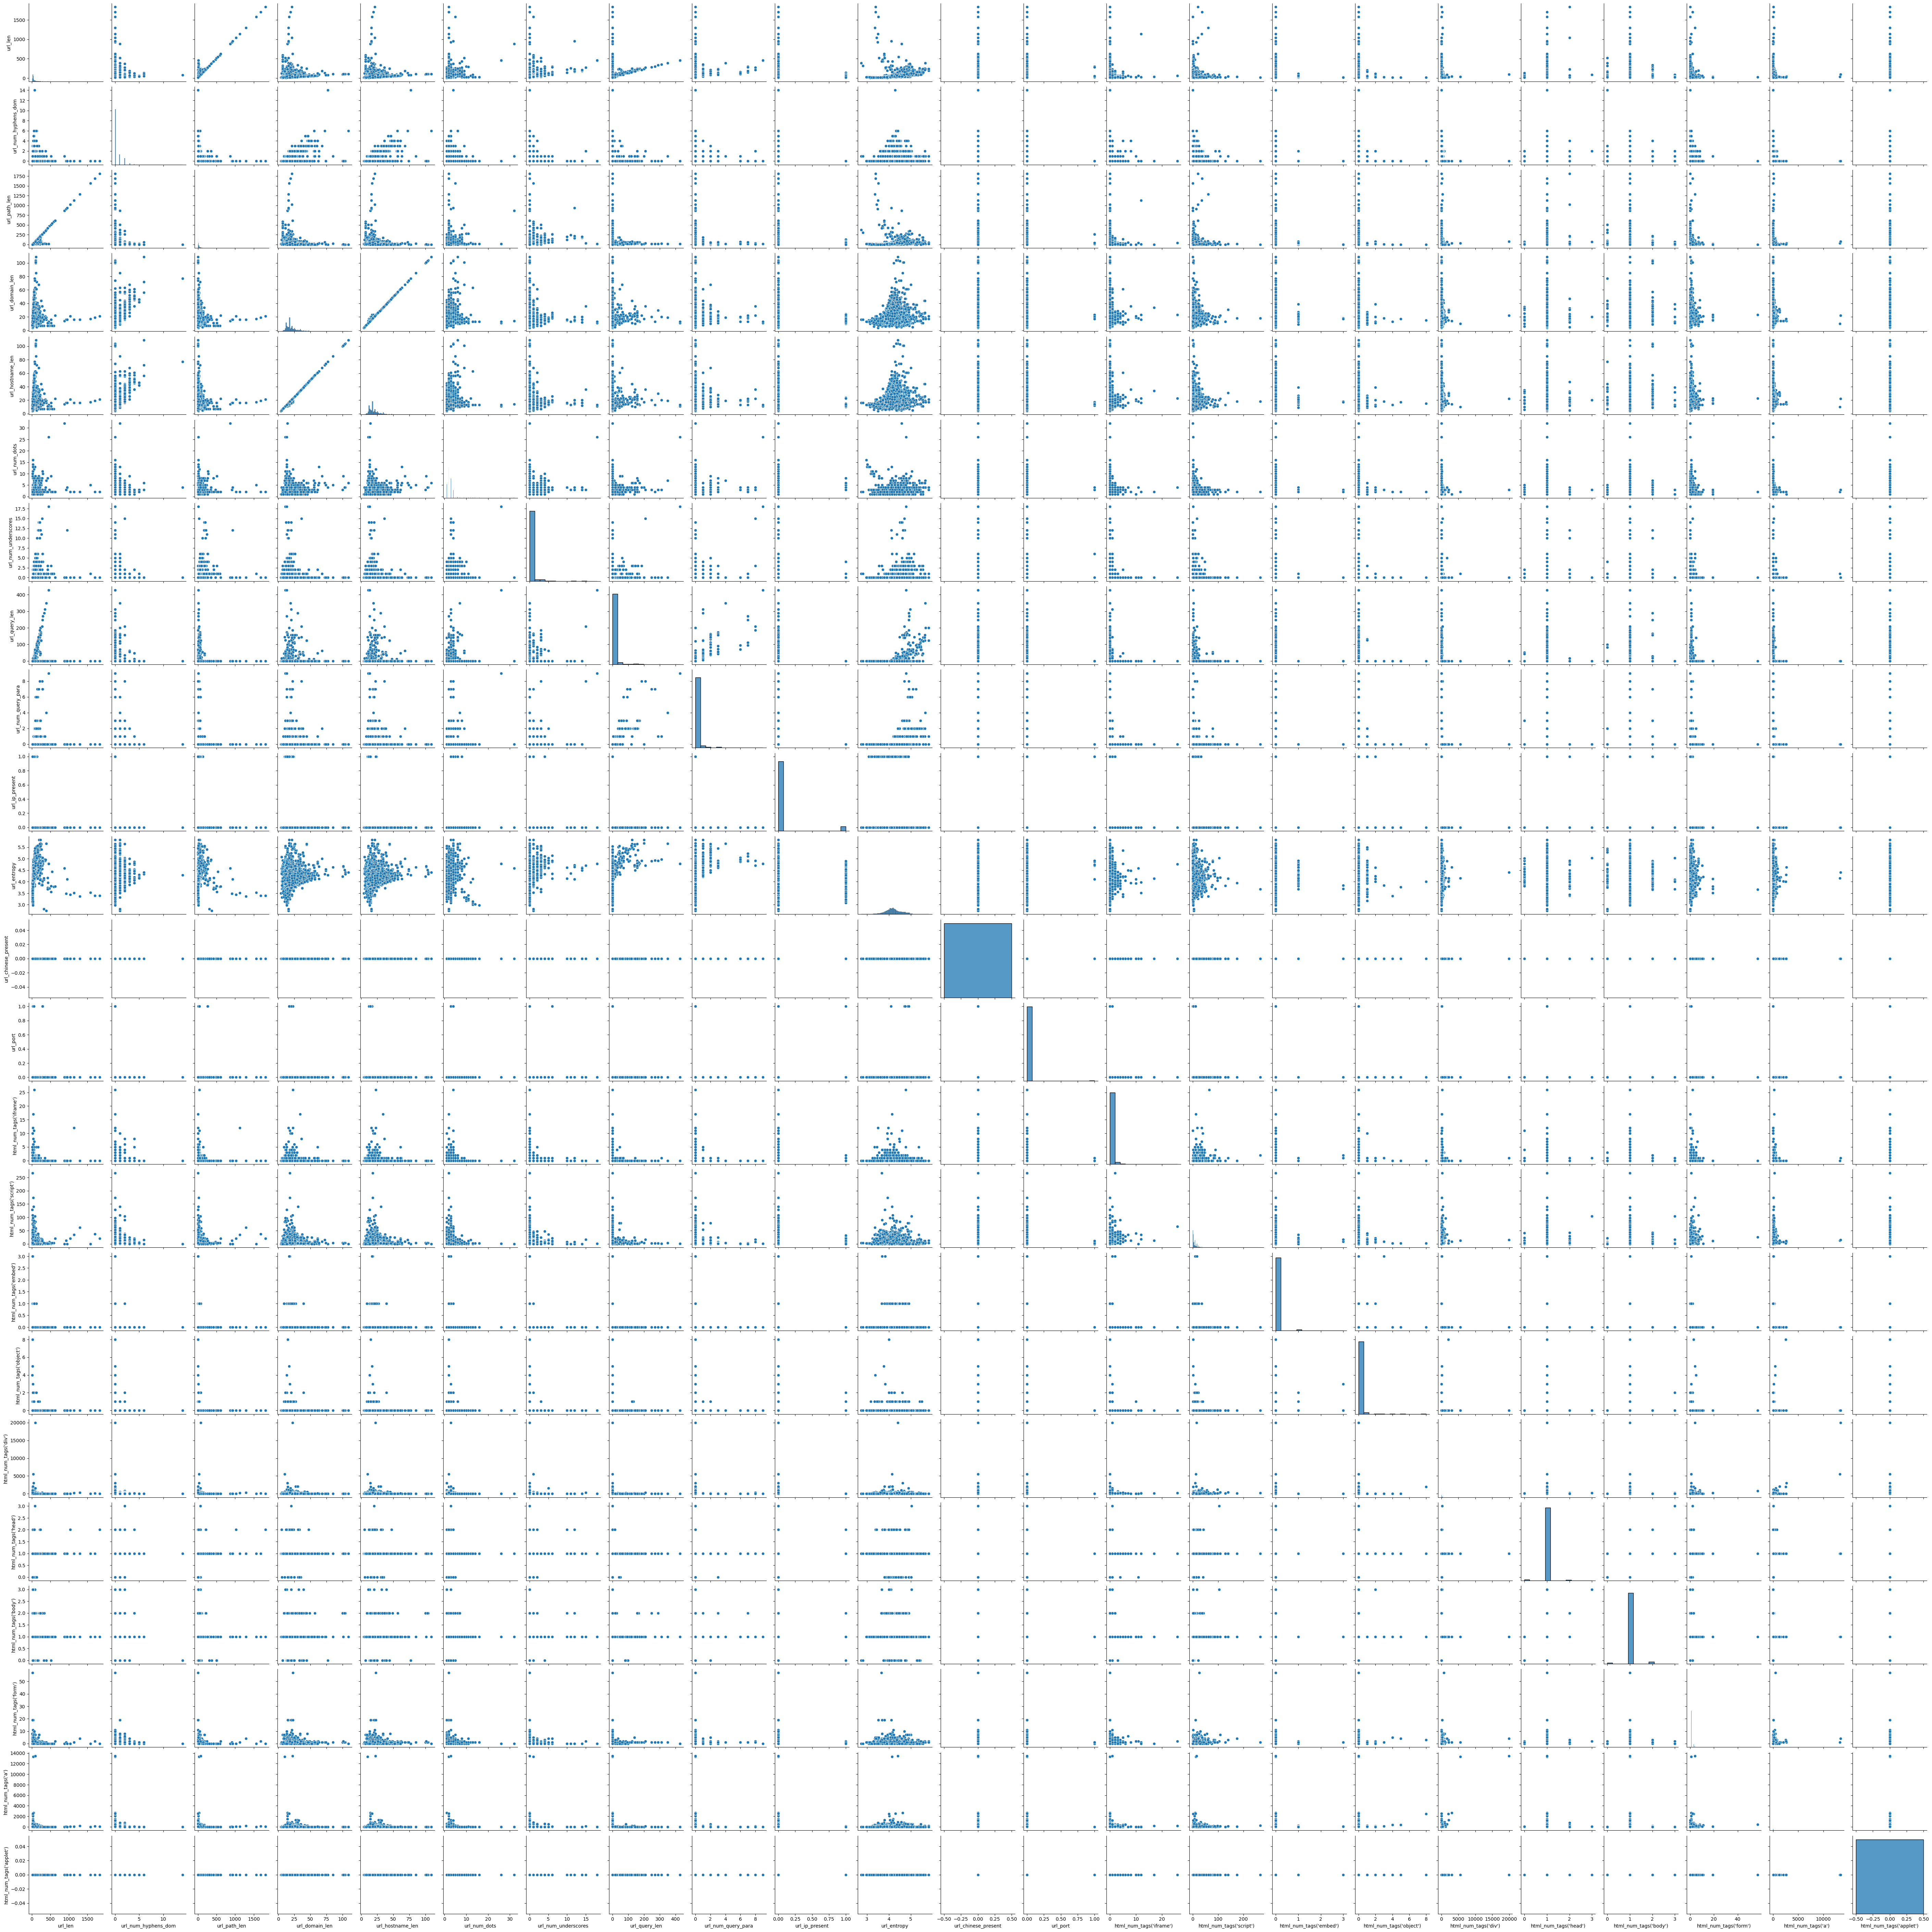

In [16]:
sns.pairplot(data)

### [수치형]
* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_entropy : URL 복잡도
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수

### [범주형]
* url_ip_present : URL내 IP표시 여부
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* label : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

In [ ]:
# target = 'label'

#### 수치, 수치 : 상관분석

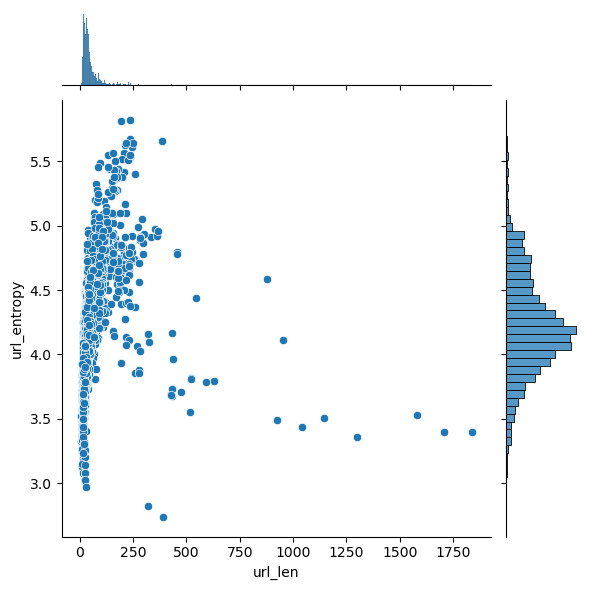

In [20]:
sns.jointplot(x='url_len', y='url_entropy', data = data) # 각각의 분포와 산점도를 함께 보여줌
plt.show()

<Axes: xlabel="html_num_tags('script')", ylabel='url_entropy'>

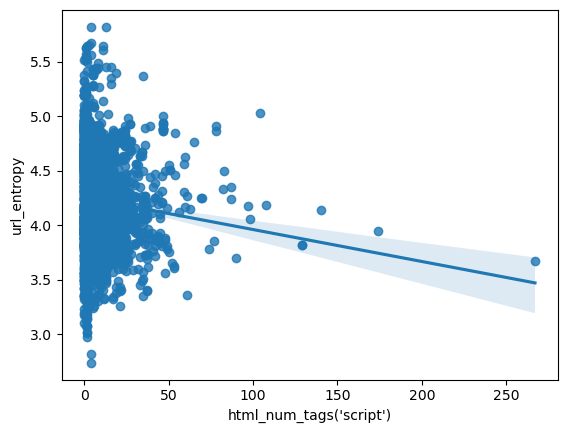

In [21]:
sns.regplot(x='''html_num_tags('script')''', y='url_entropy', data = data) 

In [17]:
# import library
import scipy.stats as spst

In [18]:
# 상관계수
data.corr()

C:\Users\User\AppData\Local\Temp\ipykernel_18152\195153614.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_chinese_present,url_port,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet')
url_len,1.000000,-0.022953,0.943058,0.003787,0.004117,0.265846,0.313610,0.325916,0.275240,-0.064589,0.271695,NaN,0.045975,0.019931,-0.031145,-0.010579,-0.021014,-0.015684,0.070786,0.045527,-0.036414,-0.022283,NaN
url_num_hyphens_dom,-0.022953,1.000000,-0.097901,0.594874,0.596240,-0.086996,-0.060620,0.002167,-0.002100,-0.124119,0.074786,NaN,-0.022807,0.006434,-0.100745,-0.051755,-0.048505,-0.010727,0.050888,-0.037459,0.047858,-0.037136,NaN
url_path_len,0.943058,-0.097901,1.000000,-0.124312,-0.124199,0.200483,0.263025,0.015388,0.014283,-0.033650,0.148673,NaN,0.051577,0.031427,0.002900,-0.002139,-0.014861,-0.010336,0.072812,-0.004275,-0.041040,-0.010525,NaN
url_domain_len,0.003787,0.594874,-0.124312,1.000000,0.998949,0.073088,-0.089833,0.016346,0.016525,-0.150334,0.161295,NaN,-0.003697,-0.007128,-0.104146,-0.011061,-0.028923,-0.002282,0.011320,0.030886,0.029068,-0.037149,NaN
url_hostname_len,0.004117,0.596240,-0.124199,0.998949,1.000000,0.069218,-0.091201,0.017311,0.017465,-0.168709,0.164477,NaN,-0.027117,-0.006514,-0.101376,-0.010341,-0.030305,-0.001095,0.011210,0.031187,0.032199,-0.035864,NaN
url_num_dots,0.265846,-0.086996,0.200483,0.073088,0.069218,1.000000,0.252325,0.213499,0.182670,0.186597,0.186755,NaN,0.033792,-0.001028,-0.084727,-0.030866,-0.017066,-0.031888,-0.026245,-0.000420,-0.070070,-0.030922,NaN
url_num_underscores,0.313610,-0.060620,0.263025,-0.089833,-0.091201,0.252325,1.000000,0.238275,0.237910,-0.048530,0.249614,NaN,0.082260,-0.023664,-0.058133,-0.028490,-0.021347,-0.018447,0.060128,0.029485,-0.074647,-0.004400,NaN
url_query_len,0.325916,0.002167,0.015388,0.016346,0.017311,0.213499,0.238275,1.000000,0.838152,-0.047342,0.356455,NaN,-0.008699,-0.029652,-0.069966,-0.023136,-0.010979,-0.017879,0.000145,0.149054,-0.002468,-0.025314,NaN
url_num_query_para,0.275240,-0.002100,0.014283,0.016525,0.017465,0.182670,0.237910,0.838152,1.000000,-0.046220,0.326074,NaN,-0.008493,-0.032459,-0.068069,-0.022588,-0.016102,-0.016305,-0.017280,0.108940,-0.007007,-0.025140,NaN
url_ip_present,-0.064589,-0.124119,-0.033650,-0.150334,-0.168709,0.186597,-0.048530,-0.047342,-0.046220,1.000000,-0.159034,NaN,0.110379,-0.025720,-0.083789,-0.031671,0.050671,-0.033419,0.011231,-0.018812,-0.082826,-0.038185,NaN


C:\Users\User\AppData\Local\Temp\ipykernel_18152\1230020142.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

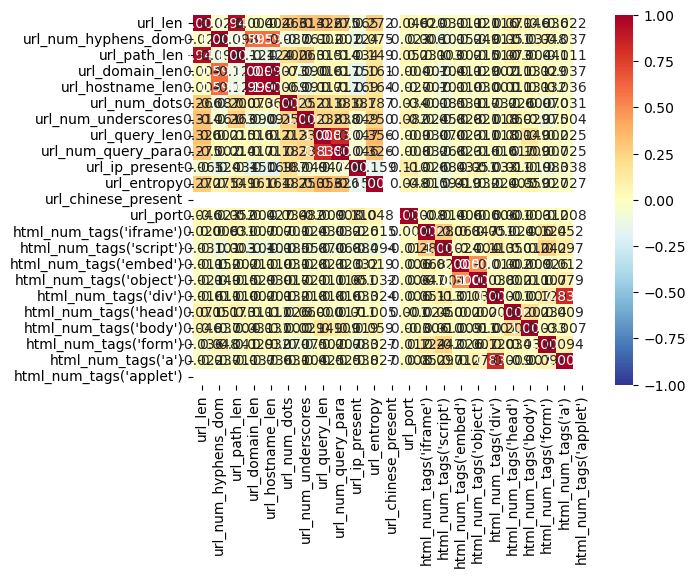

In [19]:
# 상관계수 시각화 heatmap
sns.heatmap(data.corr(),
            annot = True,
            fmt = '.3f',
            cmap = 'RdYlBu_r',
            vmin = -1,
            vmax = 1)

In [22]:
spst.pearsonr(data['url_len'], data['url_entropy'])

PearsonRResult(statistic=0.27169526794650245, pvalue=5.072392807386014e-63)

#### 범주, 범주 : 카이제곱검정

In [27]:
# mosaic plot import 
from statsmodels.graphics.mosaicplot import mosaic  #mosaic plot!

In [28]:
# 교차표
pd.crosstab(data['url_ip_present'], data['label'])

label,benign,malicious
url_ip_present,,
0.0,1710,1731
1.0,148,75


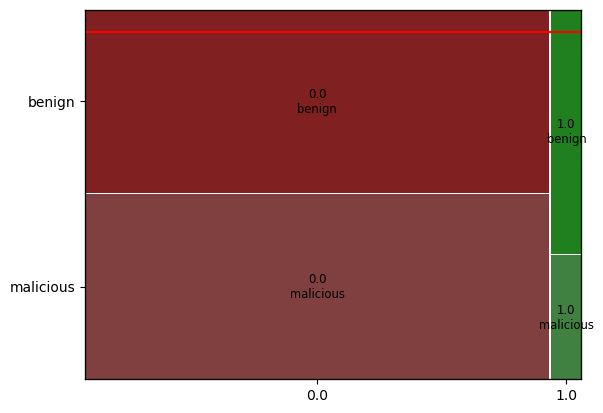

In [34]:
# 시각화, mosaic plot
mosaic(data, ['url_ip_present', 'label'])
plt.axhline(1- data['url_ip_present'].mean(), color = 'r')

label             benign  malicious
url_ip_present                     
0.0             0.496949   0.503051
1.0             0.663677   0.336323


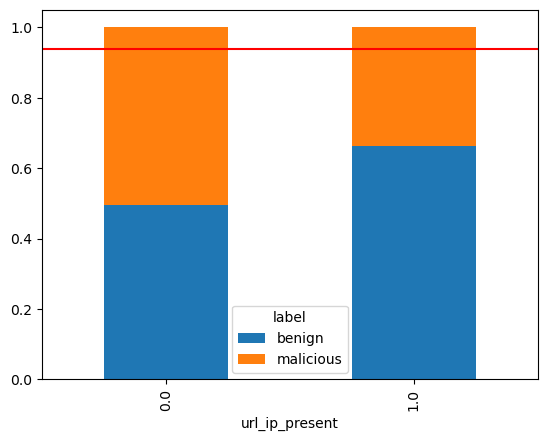

In [35]:
temp = pd.crosstab(data['url_ip_present'], data['label'], normalize = 'index') # 집계를 먼저 하고
print(temp)
temp.plot.bar(stacked=True)
plt.axhline(1-data['url_ip_present'].mean(), color = 'r')

In [36]:
# 1) 먼저 교차표 집계
table = pd.crosstab(data['url_ip_present'], data['label'])
print(table)
print('-' * 50)

# 2) 카이제곱검정
spst.chi2_contingency(table)

label           benign  malicious
url_ip_present                   
0.0               1710       1731
1.0                148         75
--------------------------------------------------


Chi2ContingencyResult(statistic=22.629448734296957, pvalue=1.9645029354744843e-06, dof=1, expected_freq=array([[1744.91757642, 1696.08242358],
       [ 113.08242358,  109.91757642]]))

# <b>Step 2. 데이터 전처리
---

## <b>Q3. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [38]:
# 데이터 프레임의 info를 확인합니다.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [39]:
# 중복 데이터 제거를 제거합니다.
df = data.drop_duplicates()

In [40]:
# 데이터 프레임의 info를 확인합니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script') 

---

## <b>Q4. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* [unique](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:blue">[예시] df_ex 데이터 프레임에서 replace 함수를 활용 'CA'는'California'로 'NY'는 'NewYork'으로 변경합니다.<span>

In [41]:
import pandas as pd

df_ex = pd.DataFrame({'name': ['Alice','Bob','Charlie','Dave','Ellen','Frank'],
                   'age': [24,42,18,68,24,30],
                   'state': ['NY','CA','CA','TX','CA','NY'],
                   'point': [64,24,70,70,88,57]}
                  )

print(df_ex)

      name  age state  point
0    Alice   24    NY     64
1      Bob   42    CA     24
2  Charlie   18    CA     70
3     Dave   68    TX     70
4    Ellen   24    CA     88
5    Frank   30    NY     57


### <span style="color:darkred">[문제2] series.copy()를 이용하여 'label' column의 데이터를 'label_binary' column으로 복사해보세요.<span>

In [ ]:
# series.copy() 로 복사하여 새로운 컬럼을 생성합니다.

### <span style="color:darkred">[문제3] replace() 함수를 활용하여 'label_binary'의 'benign'은 0으로 'malicious'은 1로 변경해주세요. <br><br> 'label'과 데이터를 비교해 보세요.<span>

In [3]:
# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.






In [9]:
# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인




---

## <b>Q5. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제4] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [1]:
# 결축치의 존재를 확인합니다.



In [2]:
# 결측치를 적절히 처리해줍니다.




In [2]:
# 결축치의 존재를 확인합니다.



---

## <b>Q6. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제5] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

---

## <b>Q7. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


**<span style="color:green">[참고링크] 공식 Document**</span>

* train_test_split(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

### <span style="color:darkred">[문제6] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>